In [1]:
import os 
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import sys

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

'''
Problem 1d: MLPs \& the Spiral Problem

@author - Min-Chun Wu
'''
def softmax_loss(X, y):
# Forward pass
    N = X.shape[0]
    X -= np.max(X, axis=1, keepdims=True)
    exp_vals = np.exp(X)
    probs = exp_vals / np.sum(exp_vals, axis=1, keepdims=True)
    loss = -np.mean(np.log(probs[range(N), y]))
# Backward pass
    dX = np.array(probs, copy=True)
    dX[range(N), y] -= 1
    dX /= N
    return loss, probs, dX

def computeCost(X,y,theta,reg):
# WRITEME: write your code here to complete the routine
    W1, b1, W2, b2 = theta[0], theta[1], theta[2], theta[3]
    z = X.dot(W1) + b1       # FC1
    h = np.maximum(0, z)     # ReLU
    f = h.dot(W2) + b2       # FC2
    data_loss, _, _ = softmax_loss(f, y) # Softmax
    reg_loss = 0.5 * reg * np.sum(W1**2) + 0.5 * reg * np.sum(W2**2)
    loss= data_loss + reg_loss
    return loss

def computeGrad(X,y,theta,reg): # returns nabla
    W1, b1, W2, b2 = theta[0], theta[1], theta[2], theta[3]
    z = X.dot(W1) + b1         # FC1
    h = np.maximum(0, z)       # ReLU
    f = h.dot(W2) + b2         # FC2
    _, _, df = softmax_loss(f, y) # Softmax
    dh = df.dot(W2.T)
    dz = np.array(dh, copy=True)
    dz[z <= 0] = 0
# WRITEME: write your code here to complete the routine
    dW2 = np.dot(h.T, df) + reg * W2
    db2 = np.sum(df, axis=0)
    dW1 = np.dot(X.T, dz) + reg * W1
    db1 = np.sum(dz, axis=0)
    return (dW1,db1,dW2,db2)

def predict(X,theta):
# WRITEME: write your code here to complete the routine
    W1, b1, W2, b2 = theta[0], theta[1], theta[2], theta[3]
    z = X.dot(W1) + b1         # FC1
    h = np.maximum(0, z)       # ReLU
    scores = h.dot(W2) + b2         # FC2
    probs = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    return (scores,probs)


iteration 0: loss 1.098643
iteration 10: loss 1.073533
iteration 20: loss 0.788855
iteration 30: loss 0.839005
iteration 40: loss 0.734057
iteration 50: loss 0.713123
iteration 60: loss 0.693842
iteration 70: loss 0.667773
iteration 80: loss 0.621697
iteration 90: loss 0.589406
training accuracy: 87.33%


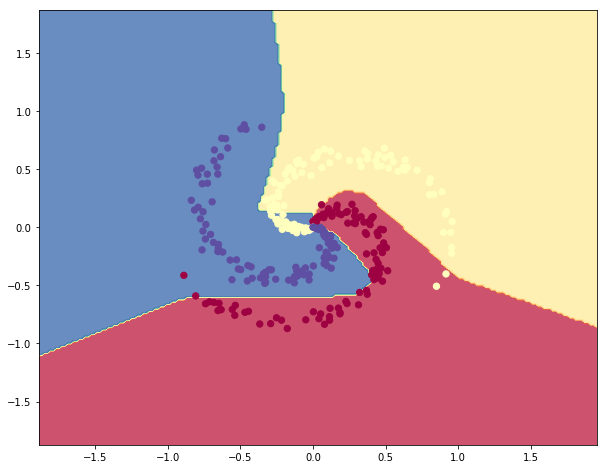

In [15]:
np.random.seed(0)
# Load in the data from disk
path = os.getcwd() + '/data/spiral_train.dat'  
data = pd.read_csv(path, header=None) 

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 

# convert from data frames to numpy matrices
X = np.array(X.values)  
y = np.array(y.values)
y = y.flatten()

# initialize parameters randomly
D = X.shape[1]
K = np.amax(y) + 1

# initialize parameters randomly
h = 50 # size of hidden layer
W1 = 0.01 * np.random.randn(D,h)
b1 = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))
theta = (W1,b1,W2,b2)

# some hyperparameters
no_epochs = 100
check = 10 # every so many pass/epochs, print loss/error to terminal
step_size = 2.5
reg = 1e-3 # regularization strength

# gradient descent loop
for i in xrange(no_epochs):
# WRITEME: write your code here to perform a step of gradient descent & record anything else desired for later
    theta = (W1, b1, W2, b2)
    loss = computeCost(X,y,theta,reg)
    if i % check == 0:
        print "iteration %d: loss %f" % (i, loss)

    # perform a parameter update
    # WRITEME: write your update rule(s) here
    dW1, db1, dW2, db2 = computeGrad(X,y,theta,reg)
    W1 = W1 - step_size * dW1
    b1 = b1 - step_size * db1
    W2 = W2 - step_size * dW2
    b2 = b2 - step_size * db2

# TODO: remove this line below once you have correctly implemented/gradient-checked your various sub-routines
#sys.exit(0)

scores, probs = predict(X,theta)
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f%%' % (100*np.mean(predicted_class == y))

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
					 
Z, P = predict(np.c_[xx.ravel(), yy.ravel()], theta)

Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

plt.show()